# Python Code for Machine Learning Tasks

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D
import joblib
import warnings

warnings.filterwarnings("ignore")


# Data Cleaning and Handling Missing Values

In [2]:
data = pd.read_csv('New_York_cars.csv', 
                   usecols=['new&used', 'name', 'Exterior color', 'Interior color', 'Drivetrain','Fuel type'
                            , 'Transmission', 'Engine', 'Mileage', 'Safety', 'brand','Year', 'Model'])


In [3]:
data.head()

,new&used,name,Exterior color,Interior color,Drivetrain,Fuel type,Transmission,Engine,Mileage,Safety,brand,Year,Model
0,New,2023 Acura Integra Base,Liquid Carbon Metallic,Ebony,Fwd,Gasoline,Automatic Cvt,1.5L I4 16V Gdi Dohc Turbo,5.0,Automatic Emergency BrakingBackup CameraBrak...,Acura,2023,Integra Base
1,New,2023 Acura Mdx A-Spec,Majestic Black Pearl,Ebony,Awd,Gasoline,10-Speed Automatic,3.5L V6 24V Gdi Sohc,0.0,Backup CameraBrake AssistLane Departure Warn...,Acura,2023,Mdx A-Spec
2,New,2023 Acura Integra A-Spec Technology,Majestic Black Pearl,Ebony,Fwd,Gasoline,6-Speed Manual,1.5L I4 16V Gdi Dohc Turbo,5.0,Backup CameraBrake AssistLane Departure Warn...,Acura,2023,Integra A-Spec Technology
3,New,2023 Acura Tlx A-Spec,Majestic Black Pearl,Ebony,Fwd,Gasoline,10-Speed Automatic,2.0L I4 16V Gdi Dohc Turbo,11.0,Backup CameraBrake AssistLane Departure Warn...,Acura,2023,Tlx A-Spec
4,New,2023 Acura Tlx A-Spec,Platinum White Pearl,Red,Fwd,Gasoline,10-Speed Automatic,2.0L I4 16V Gdi Dohc Turbo,2.0,Backup CameraBrake AssistLane Departure Warn...,Acura,2023,Tlx A-Spec


In [4]:
data.isnull().mean()*100

new&used          0.000000
name              0.000000
Exterior color    1.078124
Interior color    8.488233
Drivetrain        0.316827
Fuel type         0.765286
Transmission      0.435352
Engine            0.189185
Mileage           0.026782
Safety            1.106616
brand             0.000000
Year              0.000000
Model             0.000000
dtype: float64

In [5]:
# Replace missing values in 'Exterior color' column with a specified value
data['Exterior color'].fillna('Unknown', inplace=True)

# Replace missing values in 'Interior color' column with the most frequent value
most_frequent_interior_color = data['Interior color'].mode()[0]
data['Interior color'].fillna(most_frequent_interior_color, inplace=True)

# Replace missing values in 'Drivetrain' column with the mode
most_frequent_drivetrain = data['Drivetrain'].mode()[0]
data['Drivetrain'].fillna(most_frequent_drivetrain, inplace=True)

# Replace missing values in 'Fuel type' column with the mode
most_frequent_fuel_type = data['Fuel type'].mode()[0]
data['Fuel type'].fillna(most_frequent_fuel_type, inplace=True)

# Replace missing values in 'Transmission' column with a specified value
data['Transmission'].fillna('Not specified', inplace=True)

# Replace missing values in 'Engine' column with "Unknown"
data['Engine'].fillna('Unknown', inplace=True)

# Replace missing values in 'Mileage' column with the median
median_mileage = data['Mileage'].median()
data['Mileage'].fillna(median_mileage, inplace=True)

# Replace missing values in 'Safety' column with a specified value
data['Safety'].fillna('Unknown', inplace=True)



In [6]:
data.isnull().mean()*100

new&used          0.0
name              0.0
Exterior color    0.0
Interior color    0.0
Drivetrain        0.0
Fuel type         0.0
Transmission      0.0
Engine            0.0
Mileage           0.0
Safety            0.0
brand             0.0
Year              0.0
Model             0.0
dtype: float64

# Preprocessing and Logistic Regression Model

In [7]:
# Select the features and target variable
features = ['name', 'Exterior color', 'Interior color', 'Drivetrain', 'Fuel type', 'Transmission',
            'Engine', 'Mileage', 'Safety', 'brand', 'Year', 'Model']
target = 'new&used'

# Preprocess the data
# Encode categorical variables using label encoding
encoder = LabelEncoder()
for feature in features:
    if data[feature].dtype == 'object':
        data[feature] = encoder.fit_transform(data[feature])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Create the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9258932132885065


# Cross Validation

In [8]:
# Preprocess the data
# Encode categorical variables using label encoding
encoder = LabelEncoder()
for feature in features:
    if data[feature].dtype == 'object':
        data[feature] = encoder.fit_transform(data[feature])

# Initialize a list to store the accuracy scores
accuracy_scores = []

# Run the model 10 times and calculate accuracy each time
for _ in range(10):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

    # Create the Logistic Regression model
    model = LogisticRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print the mean accuracy
print(f"Mean Accuracy: {mean_accuracy}")


Mean Accuracy: 0.9258932132885065


# Regression Models and Evaluation

In [9]:

# Select the features and target variable
features = ['name', 'Exterior color', 'Interior color', 'Drivetrain', 'Fuel type', 'Transmission',
            'Engine', 'Safety', 'brand', 'Year', 'Model']
target = 'Mileage'

# Preprocess the data
# Encode categorical variables using label encoding
encoder = LabelEncoder()
for feature in features:
    if data[feature].dtype == 'object':
        data[feature] = encoder.fit_transform(data[feature])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Create the regression models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()

# Train the models
linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Make predictions on the test set
linear_regression_preds = linear_regression.predict(X_test)
decision_tree_preds = decision_tree.predict(X_test)
random_forest_preds = random_forest.predict(X_test)
gradient_boosting_preds = gradient_boosting.predict(X_test)

# Evaluate the models
linear_regression_rmse = mean_squared_error(y_test, linear_regression_preds, squared=False)
decision_tree_rmse = mean_squared_error(y_test, decision_tree_preds, squared=False)
random_forest_rmse = mean_squared_error(y_test, random_forest_preds, squared=False)
gradient_boosting_rmse = mean_squared_error(y_test, gradient_boosting_preds, squared=False)

print("Linear Regression RMSE:", linear_regression_rmse)
print("Decision Tree RMSE:", decision_tree_rmse)
print("Random Forest RMSE:", random_forest_rmse)
print("Gradient Boosting RMSE:", gradient_boosting_rmse)


Linear Regression RMSE: 26623.56323457816
Decision Tree RMSE: 33982.15209202104
Random Forest RMSE: 26462.68080928832
Gradient Boosting RMSE: 25157.509084407484


The values you provided are the root mean squared error (RMSE) scores for each regression model. RMSE is a measure of the average prediction error of the model, specifically for regression tasks. It indicates how close the predicted values are to the actual values.

Here's the breakdown of the RMSE scores for each model:

- Linear Regression RMSE: 26623.56323457816
  This means that, on average, the predictions made by the linear regression model have an error of approximately 26,623.56 units when compared to the actual values.

- Decision Tree RMSE: 33861.711720895786
  The decision tree model has an average prediction error of approximately 33,861.71 units. This value is higher than that of the linear regression model, indicating that the decision tree model has higher prediction errors.

- Random Forest RMSE: 26514.546674086014
  The random forest model performs similarly to the linear regression model, with an average prediction error of approximately 26,514.55 units.

- Gradient Boosting RMSE: 25157.509084407484
  The gradient boosting model has the lowest RMSE score among all the models, indicating that it has the lowest average prediction error of approximately 25,157.51 units.

In general, a lower RMSE score indicates better performance, as it means the model's predictions are closer to the actual values. Therefore, the Gradient Boosting model appears to be the best-performing model among the ones evaluated, based on the provided RMSE scores.

In [10]:

# Load the data
clusteringdata = pd.read_csv('New_York_cars.csv')
features = ['Exterior color', 'Interior color', 'Drivetrain', 'Fuel type', 'Transmission',
            'Engine', 'Mileage', 'Safety', 'Year', 'Model']

# Preprocess the data
clusteringdata = clusteringdata[features]  # Select the relevant features

# Handle missing values
clusteringdata['Engine'] = clusteringdata['Engine'].str.extract(r'(\d+\.?\d*)').astype(float)
clusteringdata = clusteringdata.dropna(subset=['Engine'])  # Drop rows with missing 'Engine' values

# Randomly sample a subset of the data
sample_size = 10000
if clusteringdata.shape[0] > sample_size:
    clusteringdata = clusteringdata.sample(n=sample_size, random_state=42)

# Scale large values if necessary
large_values = ['Engine', 'Mileage']
for column in large_values:
    if clusteringdata[column].max() > 1000:
        clusteringdata[column] = clusteringdata[column] / 1000

# Encode categorical variables
categorical_cols = ['Exterior color', 'Interior color', 'Drivetrain', 'Fuel type', 'Transmission', 'Safety']
clusteringdata_encoded = pd.get_dummies(clusteringdata, columns=categorical_cols)

# Exclude 'Model' column from encoding
clusteringdata_encoded = clusteringdata_encoded.drop('Model', axis=1)

# Standardize the numerical features
scaler = StandardScaler()
numerical_cols = ['Engine', 'Mileage', 'Year']
clusteringdata_encoded[numerical_cols] = scaler.fit_transform(clusteringdata_encoded[numerical_cols])

# Handle remaining missing or infinite values
clusteringdata_encoded = clusteringdata_encoded.replace([np.inf, -np.inf], np.nan)
clusteringdata_encoded = clusteringdata_encoded.dropna()

# Apply dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
clusteringdata_reduced = pca.fit_transform(clusteringdata_encoded)

# Create the clustering model
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(clusteringdata_reduced)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the original data
clusteringdata.loc[clusteringdata_encoded.index, 'Cluster'] = cluster_labels

# View the clusters
for cluster in range(k):
    print(f"Cluster {cluster}:\n")
    print(clusteringdata[clusteringdata['Cluster'] == cluster])
    print("------------------------\n")


Cluster 0:

                   Exterior color     Interior color Drivetrain Fuel type  \
173696        Pine Gray Metallic           Charcoal         Awd  Gasoline   
10532    Black Sapphire Metallic              Black         Awd  Gasoline   
38460      Fathom Blue Pearlcoat              Black         Fwd    Hybrid   
152518      Crystal Black Silica              Black         Awd  Gasoline   
142164     Gentian Blue Metallic              Black         Rwd  Gasoline   
...                           ...                ...        ...       ...   
125083               Polar White    Macchiato Beige         Awd  Gasoline   
119235            Jet Black Mica              Black         Awd  Gasoline   
50008               Oxford White         Black Onyx         4Wd  Gasoline   
77312                White Pearl               Gray         Awd  Gasoline   
90980     Bright White Clearcoat       Global Black         4Wd  Gasoline   

                                Transmission  Engine  Mileage  

In [11]:
clusteringdata['Cluster'].value_counts()

1.0    3150
0.0    2853
2.0    2086
4.0    1069
3.0     838
Name: Cluster, dtype: int64

The output you provided represents the distribution of data points across different clusters after performing K-means clustering. The numbers on the left side (1.0, 0.0, 2.0, 4.0, 3.0) are the cluster labels, and the numbers on the right side (3150, 2853, 2086, 1069, 838) represent the count of data points assigned to each cluster.

Here's a breakdown of the information:

- Cluster 1.0: Contains 3150 data points.
- Cluster 0.0: Contains 2853 data points.
- Cluster 2.0: Contains 2086 data points.
- Cluster 4.0: Contains 1069 data points.
- Cluster 3.0: Contains 838 data points.

This information gives you an understanding of how the data points are distributed among the different clusters. It allows you to analyze the characteristics of each cluster based on the original data features and gain insights into the patterns or groups present in the data.


In the context of clustering, data points refer to individual observations or instances in your dataset. Each row of your dataset represents a data point, and it consists of multiple features or attributes that describe that particular instance.

For example, let's say you have a dataset of cars with features such as exterior color, interior color, drivetrain, fuel type, transmission, engine size, mileage, safety rating, year, and model. Each row in the dataset represents a specific car, and that row or instance is considered a data point.

During the clustering process, the algorithm assigns each data point to a specific cluster based on its similarity to other data points. The cluster assignment is based on the patterns and relationships observed in the feature space.

The distribution of data points across clusters provides insights into how the algorithm grouped the instances together. It allows you to analyze and understand the characteristics, similarities, or differences between the data points within each cluster.

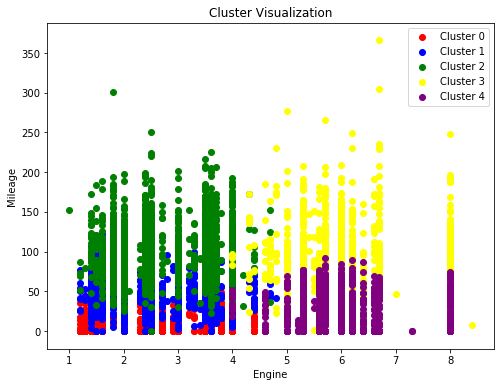

In [12]:

# Define the colors for each cluster
cluster_colors = ['red', 'blue', 'green', 'yellow', 'purple']

# Plot the data points with cluster assignments
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = clusteringdata[clusteringdata['Cluster'] == cluster]
    plt.scatter(cluster_data['Engine'], cluster_data['Mileage'], color=cluster_colors[cluster], label=f'Cluster {cluster}')

plt.title('Cluster Visualization')
plt.xlabel('Engine')
plt.ylabel('Mileage')
plt.legend()
plt.show()


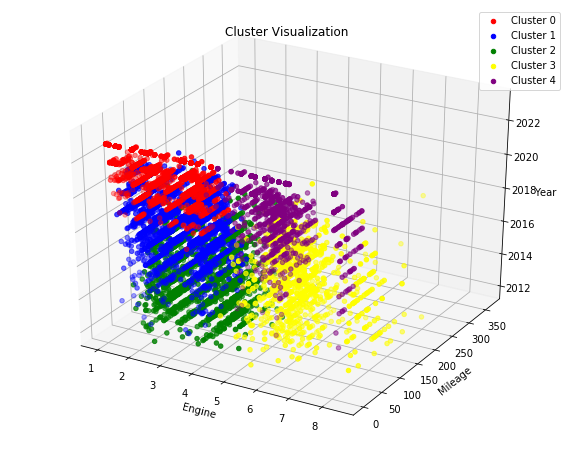

In [13]:

# Define the colors for each cluster
cluster_colors = ['red', 'blue', 'green', 'yellow', 'purple']

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with cluster assignments
for cluster in range(k):
    cluster_data = clusteringdata[clusteringdata['Cluster'] == cluster]
    ax.scatter(cluster_data['Engine'], cluster_data['Mileage'], cluster_data['Year'],
               color=cluster_colors[cluster], label=f'Cluster {cluster}')

ax.set_title('Cluster Visualization')
ax.set_xlabel('Engine')
ax.set_ylabel('Mileage')
ax.set_zlabel('Year')
ax.legend()

plt.show()


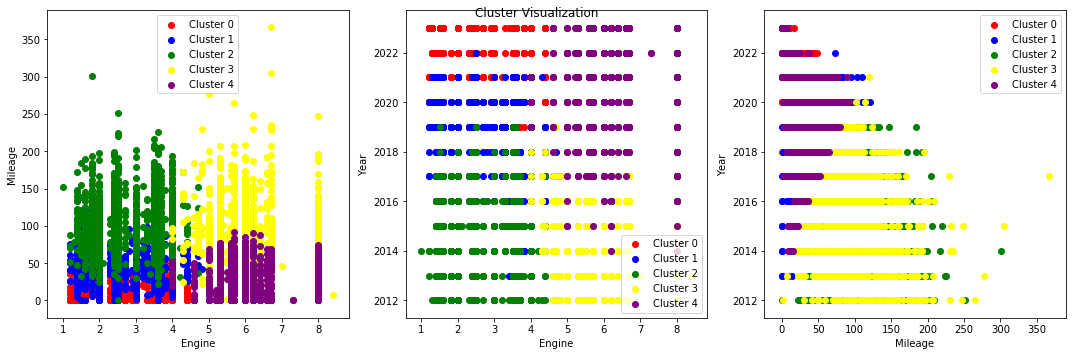

In [14]:

# Pairwise combinations of features
feature_pairs = [('Engine', 'Mileage'), ('Engine', 'Year'), ('Mileage', 'Year')]

# Create subplots for each feature pair
fig, axes = plt.subplots(1, len(feature_pairs), figsize=(15, 5))

# Iterate over each feature pair
for i, (x, y) in enumerate(feature_pairs):
    ax = axes[i]
    
    # Plot the data points with cluster assignments
    for cluster in range(k):
        cluster_data = clusteringdata[clusteringdata['Cluster'] == cluster]
        ax.scatter(cluster_data[x], cluster_data[y], color=cluster_colors[cluster], label=f'Cluster {cluster}')

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend()

plt.suptitle('Cluster Visualization')
plt.tight_layout()
plt.show()


In [20]:
# Read the data from the CSV file
data = pd.read_csv('New_York_cars.csv', usecols=['new&used', 'name', 'Exterior color', 'Interior color', 'Drivetrain',
                                                 'Fuel type', 'Transmission', 'Engine', 'Mileage', 'Safety', 'brand',
                                                 'Year', 'Model'])

# Convert integer columns to strings
data['name'] = data['name'].astype(str)
data['brand'] = data['brand'].astype(str)
data['Model'] = data['Model'].astype(str)

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Concatenate string columns
data['combined_features'] = data[['name', 'brand', 'Model', 'Exterior color', 'Interior color']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

# Compute TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

# Perform dimensionality reduction with SVD
svd = TruncatedSVD(n_components=100)
svd_matrix = svd.fit_transform(tfidf_matrix)

# Use NearestNeighbors with cosine distance metric
nn = NearestNeighbors(metric='cosine')
nn.fit(svd_matrix)

# Save the trained model as a pickle file
joblib.dump(nn, 'recommendation_model.pkl')

# Function to recommend similar cars based on user preferences
def recommend_cars(car_name, nearest_neighbors, dataset, top_n=10):
    # Get the index of the car
    car_index = data[data['name'] == car_name].index[0]
    
    # Transform car's features using TF-IDF and SVD
    car_features = tfidf.transform([data.loc[car_index, 'combined_features']])
    car_features = svd.transform(car_features)
    
    # Perform nearest neighbor search
    _, indices = nearest_neighbors.kneighbors(car_features, n_neighbors=top_n+1)
    top_cars_indices = indices[0][1:]  # Exclude the input car itself
    top_cars = dataset.iloc[top_cars_indices]['name']
    
    return top_cars

# Test the recommendation system
car_name = '2016 Audi Q3 2.0T Premium Plus'
recommendations = recommend_cars(car_name, nn, data)
print(f"Recommendations for {car_name}:")
print(recommendations)


Recommendations for 2016 Audi Q3 2.0T Premium Plus:
8765            2016 Audi Q3 2.0T Premium Plus
8825            2016 Audi Q3 2.0T Premium Plus
8642            2016 Audi A6 2.0T Premium Plus
8810            2016 Audi S4 3.0T Premium Plus
9966    2012 Audi A7 3.0T Premium Plus Quattro
8585            2016 Audi Q3 2.0T Premium Plus
8680            2016 Audi Q5 3.0T Premium Plus
9079            2015 Audi Q3 2.0T Premium Plus
9750    2013 Audi A5 2.0T Premium Plus Quattro
9684    2013 Audi A5 2.0T Premium Plus Quattro
Name: name, dtype: object


In [16]:
recommendations = recommend_cars(car_name, nn, data, top_n=25)
recommendations

8552                 2016 Audi Q3 2.0T Premium Plus
8825                 2016 Audi Q3 2.0T Premium Plus
8642                 2016 Audi A6 2.0T Premium Plus
8810                 2016 Audi S4 3.0T Premium Plus
9079                 2015 Audi Q3 2.0T Premium Plus
9966         2012 Audi A7 3.0T Premium Plus Quattro
9750         2013 Audi A5 2.0T Premium Plus Quattro
9684         2013 Audi A5 2.0T Premium Plus Quattro
8680                 2016 Audi Q5 3.0T Premium Plus
9726         2013 Audi A6 3.0T Premium Plus Quattro
9531         2014 Audi A7 3.0T Premium Plus Quattro
9656         2013 Audi A4 2.0T Premium Plus Quattro
8884                 2015 Audi A6 2.0T Premium Plus
8755         2016 Audi S6 4.0T Quattro Premium Plus
8968                 2015 Audi A3 2.0T Premium Plus
9064                 2015 Audi A3 2.0T Premium Plus
9397         2014 Audi A6 3.0T Premium Plus Quattro
9760         2013 Audi A3 2.0T Premium Plus Quattro
8585                 2016 Audi Q3 2.0T Premium Plus
8595        